In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import ParameterGrid

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Обробка даних 

In [2]:
train_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

imputer = KNNImputer(n_neighbors=5)
train_data_filled = imputer.fit_transform(train_data.select_dtypes(include=[np.number]))
test_data_filled = imputer.transform(test_data.select_dtypes(include=[np.number]))

train_data[train_data.select_dtypes(include=[np.number]).columns] = train_data_filled
test_data[test_data.select_dtypes(include=[np.number]).columns] = test_data_filled

categorical_columns = ["Sex", "Embarked"]
train_data = pd.get_dummies(train_data, columns=categorical_columns)
test_data = pd.get_dummies(test_data, columns=categorical_columns)

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Зменшення кількості просторів
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_data_scaled)
test_pca = pca.transform(test_data_scaled)


# Функції для кластерування та обробки результатів

In [3]:
def plot_clusters(data_pca, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()


def evaluate_clustering(data, clusters_range, algorithm='kmeans'):
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    for n_clusters in clusters_range:
        if algorithm == 'kmeans':
            cluster_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        elif algorithm == 'agglomerative':
            cluster_model = AgglomerativeClustering(n_clusters=n_clusters)
        elif algorithm == 'dbscan':
            cluster_model = DBSCAN(eps=n_clusters, min_samples=5) 

        labels = cluster_model.fit_predict(data)
        if len(np.unique(labels)) > 1:  
            silhouette_scores.append(silhouette_score(data, labels))
            ch_scores.append(calinski_harabasz_score(data, labels))
            db_scores.append(davies_bouldin_score(data, labels))
            plot_clusters(train_pca, labels, f'{algorithm.capitalize()} with {n_clusters} clusters')

    return silhouette_scores, ch_scores, db_scores

def print_scores(silhouette_scores, ch_scores, db_scores, clusters_range, algorithm):
    print(f"\n{algorithm.capitalize()} Clustering Scores:")
    for i, n_clusters in enumerate(clusters_range):
        print(f"Clusters: {n_clusters}")
        if i < len(silhouette_scores):  
            print(f"  Silhouette Score: {silhouette_scores[i]:.5f}")
            print(f"  Calinski-Harabasz Score: {ch_scores[i]:.5f}")
            print(f"  Davies-Bouldin Score: {db_scores[i]:.5f}")
        else:
            print("  No valid clusters formed.")

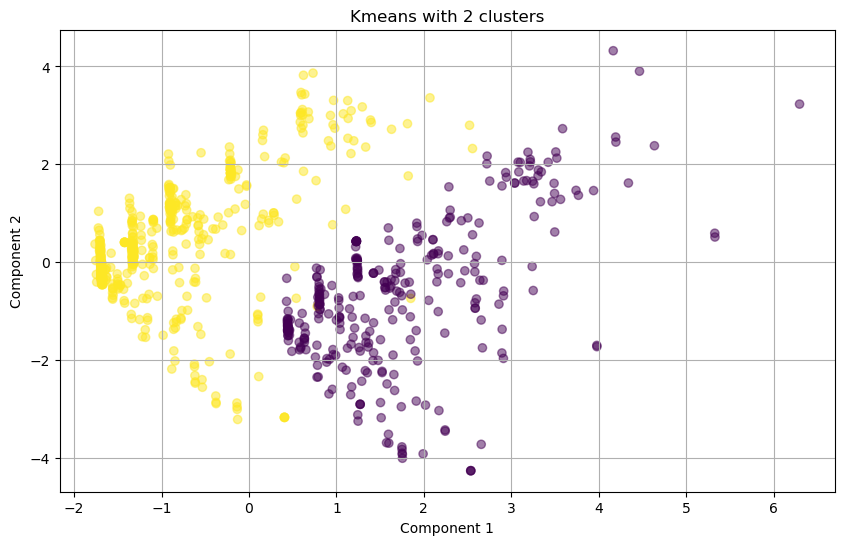

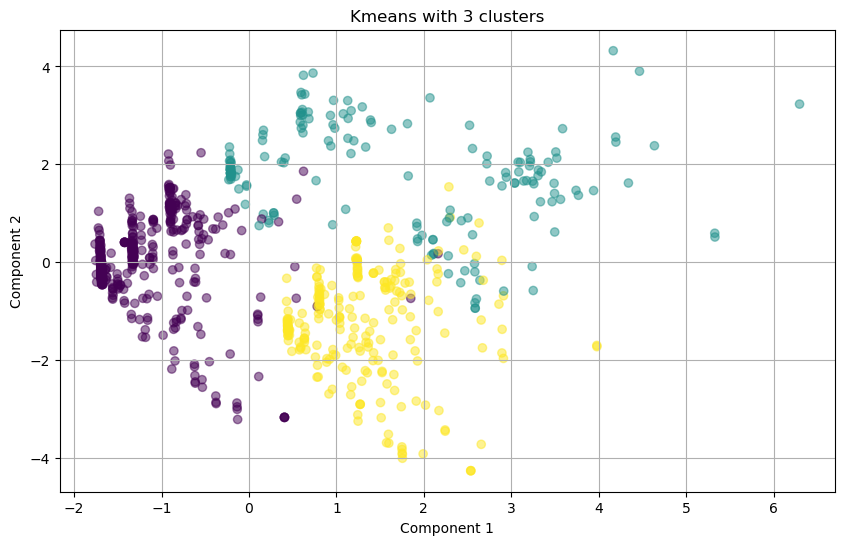

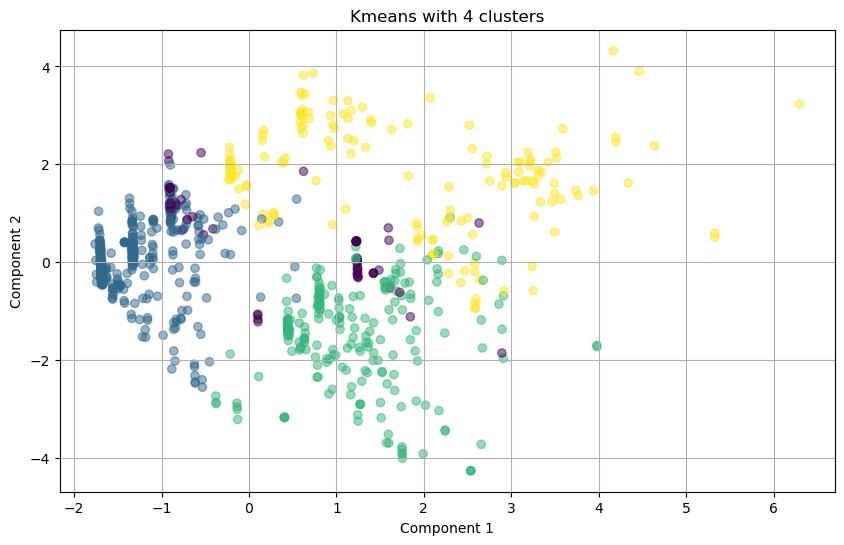

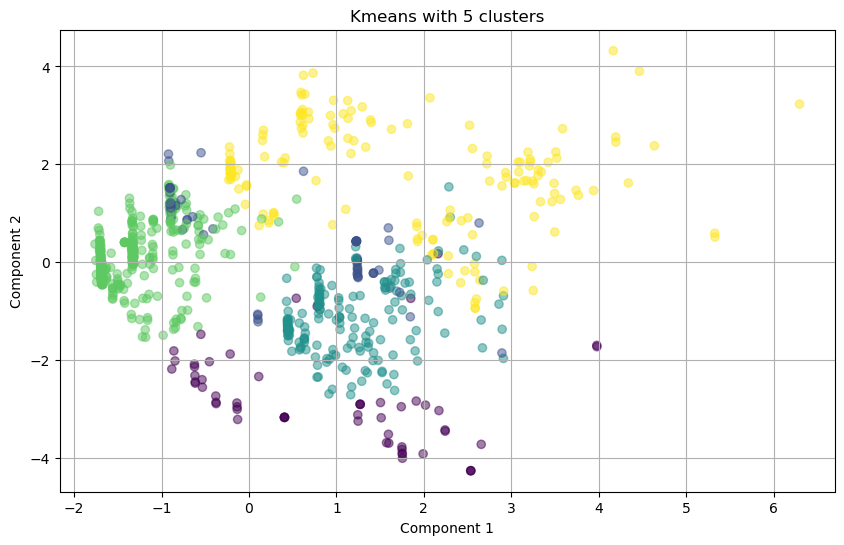

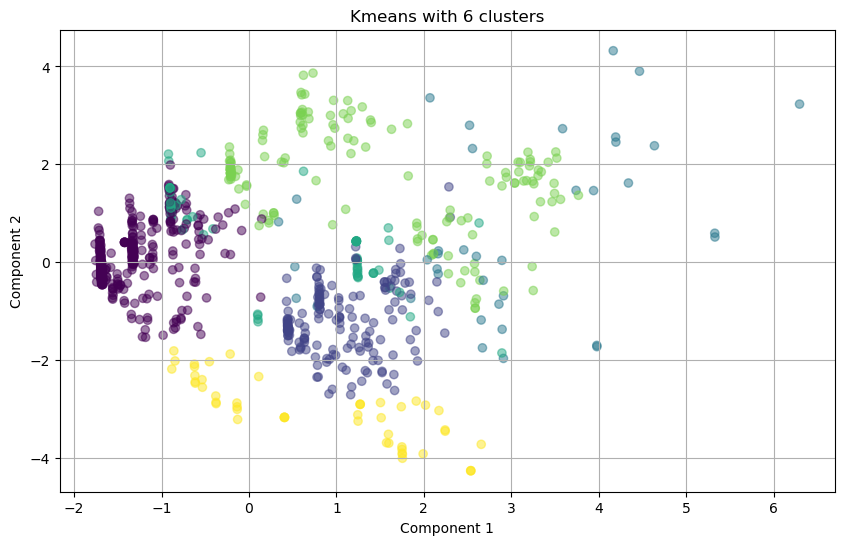


Kmeans Clustering Scores:
Clusters: 2
  Silhouette Score: 0.29966
  Calinski-Harabasz Score: 245.39818
  Davies-Bouldin Score: 1.68729
Clusters: 3
  Silhouette Score: 0.33238
  Calinski-Harabasz Score: 235.95871
  Davies-Bouldin Score: 1.43175
Clusters: 4
  Silhouette Score: 0.38398
  Calinski-Harabasz Score: 263.23940
  Davies-Bouldin Score: 1.25280
Clusters: 5
  Silhouette Score: 0.38972
  Calinski-Harabasz Score: 266.33225
  Davies-Bouldin Score: 1.14677
Clusters: 6
  Silhouette Score: 0.39800
  Calinski-Harabasz Score: 256.32999
  Davies-Bouldin Score: 1.12010


In [4]:
# KMeans
clusters_range = range(2, 7)
silhouette_kmeans, ch_kmeans, db_kmeans = evaluate_clustering(train_data_scaled, clusters_range, 'kmeans')
print_scores(silhouette_kmeans, ch_kmeans, db_kmeans, clusters_range, 'KMeans')

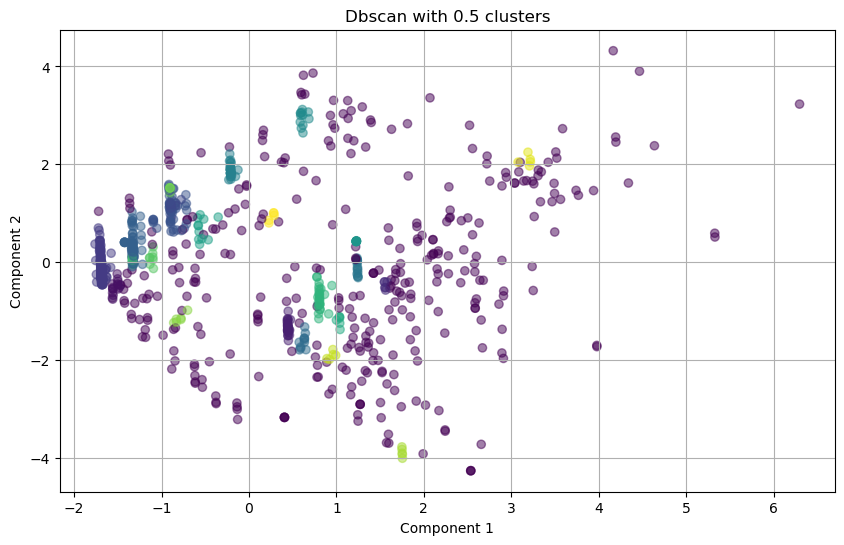

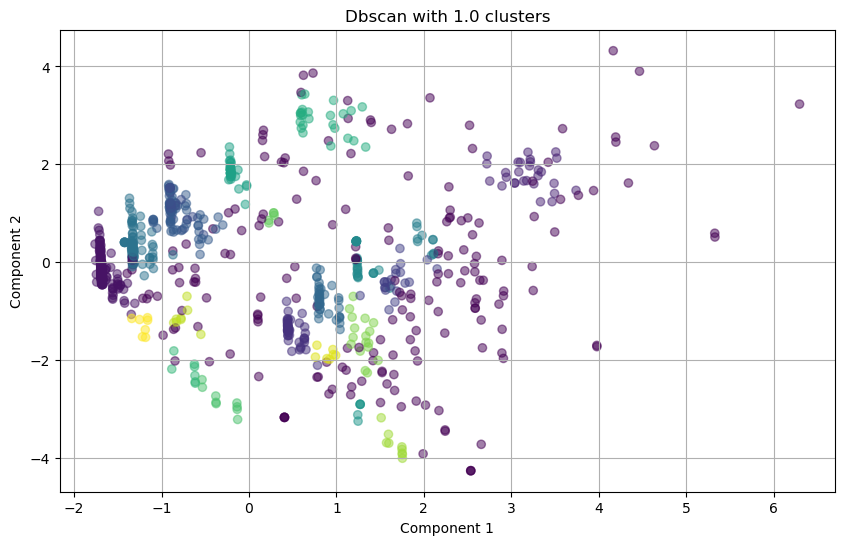

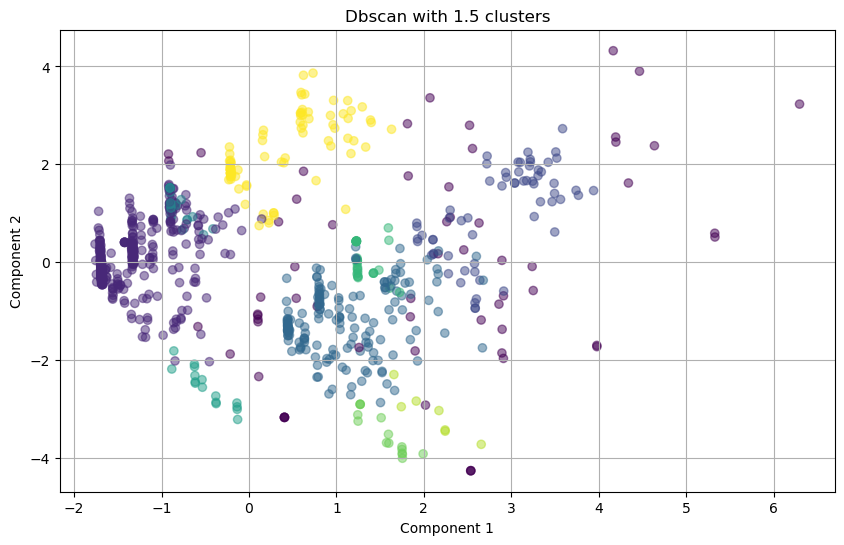

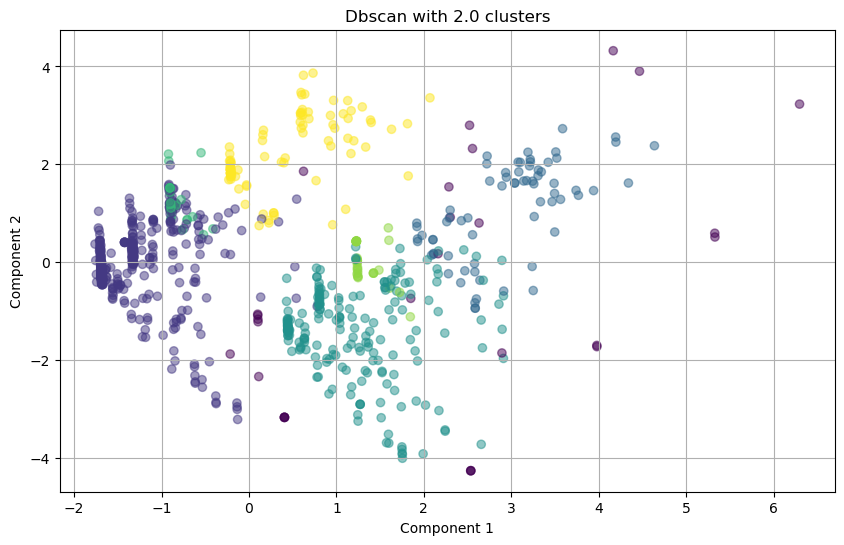


Dbscan Clustering Scores:
Clusters: 0.5
  Silhouette Score: 0.09387
  Calinski-Harabasz Score: 29.73663
  Davies-Bouldin Score: 1.27973
Clusters: 1.0
  Silhouette Score: 0.25967
  Calinski-Harabasz Score: 63.56901
  Davies-Bouldin Score: 1.39964
Clusters: 1.5
  Silhouette Score: 0.41188
  Calinski-Harabasz Score: 153.19433
  Davies-Bouldin Score: 1.43106
Clusters: 2.0
  Silhouette Score: 0.41665
  Calinski-Harabasz Score: 186.47079
  Davies-Bouldin Score: 1.43289


In [5]:
# DBSCAN with a range of eps values
epsilons = np.linspace(0.5, 2.0, num=4)
silhouette_dbscan, ch_dbscan, db_dbscan = evaluate_clustering(train_data_scaled, epsilons, 'dbscan')
print_scores(silhouette_dbscan, ch_dbscan, db_dbscan, epsilons, 'DBSCAN')

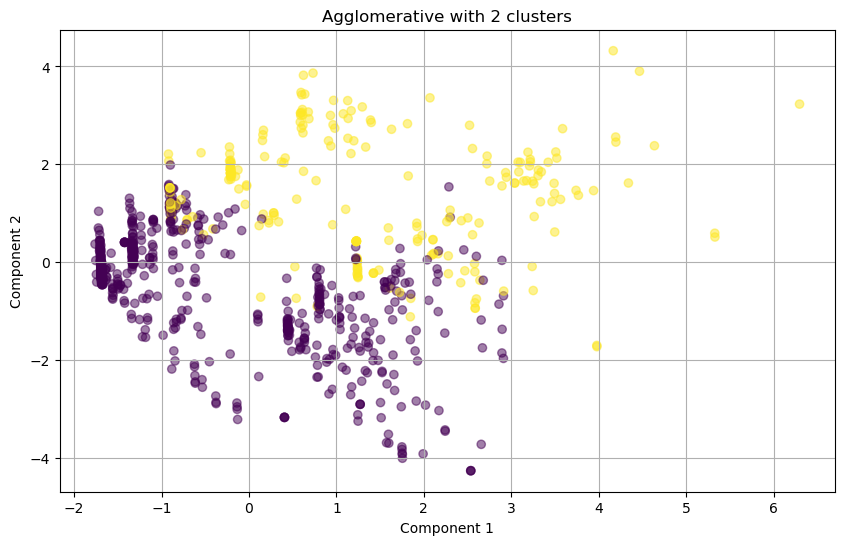

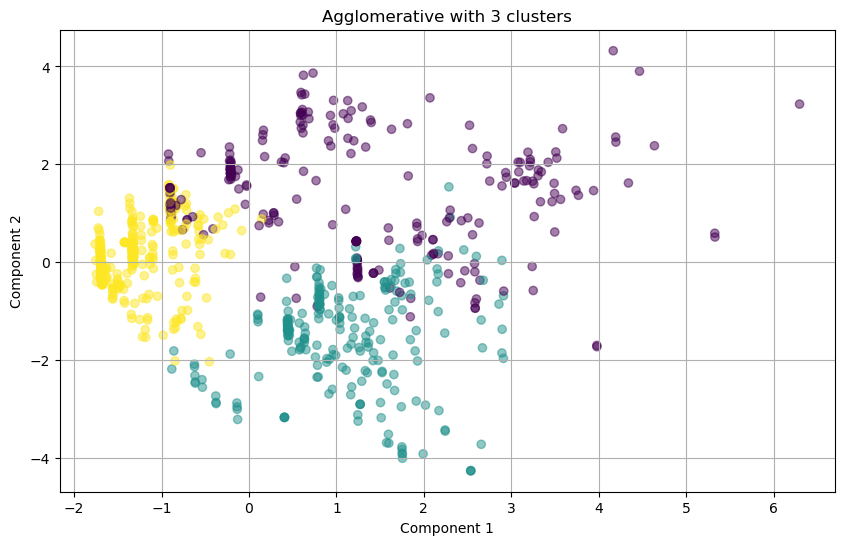

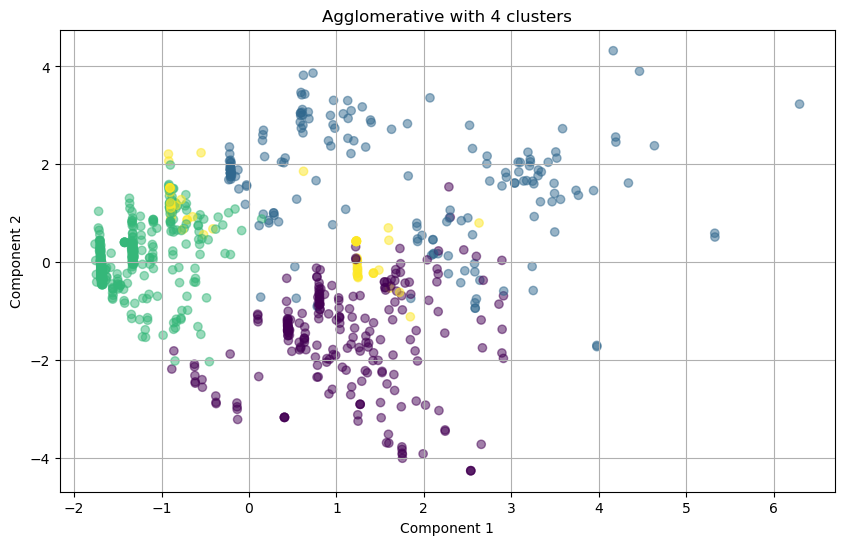

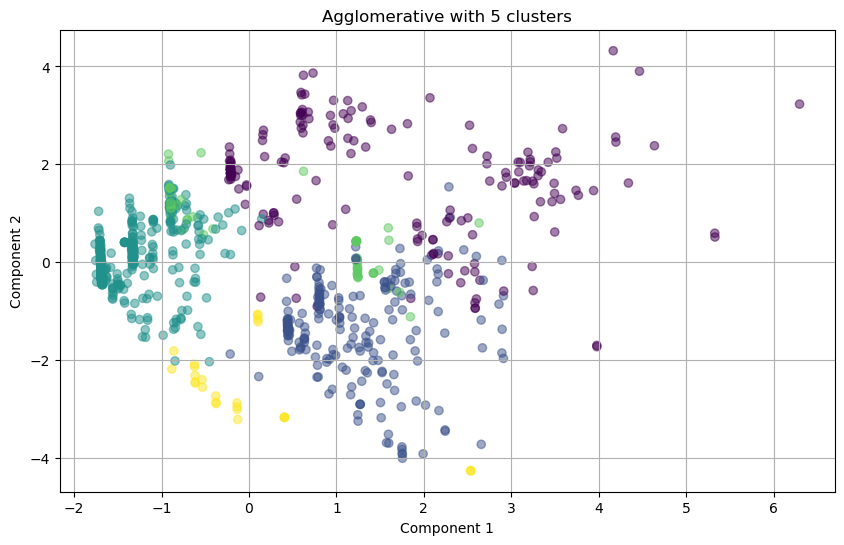

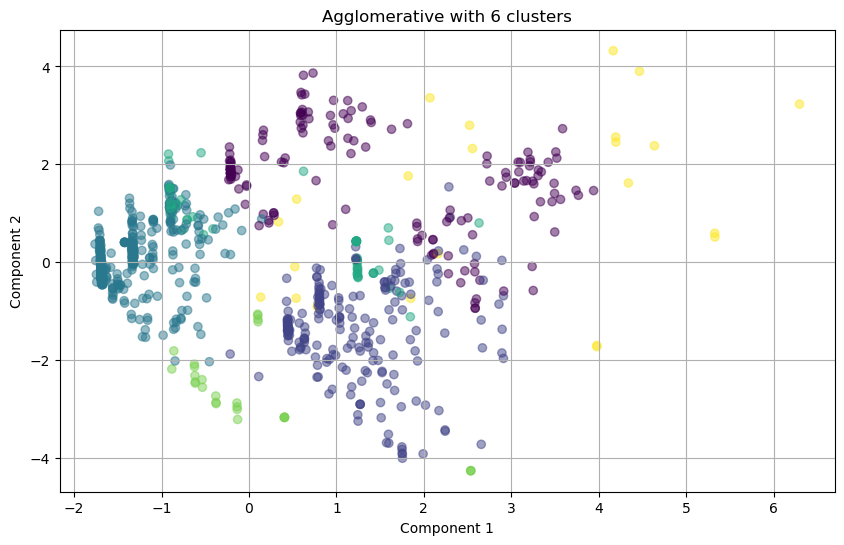


Agglomerative Clustering Scores:
Clusters: 2
  Silhouette Score: 0.30747
  Calinski-Harabasz Score: 196.94712
  Davies-Bouldin Score: 1.88435
Clusters: 3
  Silhouette Score: 0.31186
  Calinski-Harabasz Score: 217.92290
  Davies-Bouldin Score: 1.65376
Clusters: 4
  Silhouette Score: 0.37417
  Calinski-Harabasz Score: 246.17070
  Davies-Bouldin Score: 1.32328
Clusters: 5
  Silhouette Score: 0.39097
  Calinski-Harabasz Score: 242.34604
  Davies-Bouldin Score: 1.14930
Clusters: 6
  Silhouette Score: 0.40794
  Calinski-Harabasz Score: 237.57648
  Davies-Bouldin Score: 1.11168


In [6]:
# Agglomerative Clustering
silhouette_agglo, ch_agglo, db_agglo = evaluate_clustering(train_data_scaled, clusters_range, 'agglomerative')
print_scores(silhouette_agglo, ch_agglo, db_agglo, clusters_range, 'Agglomerative')

**Аналіз популяції:** Результати алгоритмів кластеризації натякає на те, що певні ключові особливості, такі як вік, клас (Pclass), стать, вартість проїзду (fare) і місце посадки відіграють значущу роль у диференціації груп пасажирів. Ці особливості, ймовірно, вплинули на результати виживання, відображаючи соціально-економічні розділи та демографічні групи:

- **Вік та Клас:** Можливо, існують виразні групи, такі як молодики проти похилих пасажирів, або пасажири вищого класу (1-й та 2-й) проти нижчого класу (3-й). Ці відмінності можуть відображати різні стратегії виживання або доступ до шлюпок.

- **Стать:** Розділення за статтю (чоловіки проти жінок) у перетворенні dummy-змінних натякає на значущі відмінності в шансах на виживання, ймовірно, через протокол "жінки та діти спочатку" під час евакуацій.

- **Вартість проїзду та Місце посадки:** Варіації у вартості проїзду можуть корелювати з соціально-економічним статусом, тоді як різні місця посадки можуть стосуватися демографічних або соціально-економічних відмінностей.

**Результати кластеризації:**

- **KMeans та Agglomerative Clustering:** Ці алгоритми показали, що зі збільшенням кількості кластерів розділення між групами стає більш виразним. Це свідчить про те, що в популяції пасажирів існують підгрупи з більш конкретними характеристиками (наприклад, самотні мандрівники, члени екіпажу).

- **Результати DBSCAN:** Враховуючи чутливість DBSCAN до щільності та шуму, збільшення продуктивності з більшим параметром eps натякає на наявність щільно упакованих груп усередині популяції, розділених менш щільними регіонами (можливо, винятки або унікальні випадки, такі як члени екіпажу або пасажири з унікальними обставинами подорожі).

**Когхзія та сепарація:**

- Високі значення silhouette scores для певних конфігурацій кластерів вказують на добру кохезію всередині кластерів та сепарацію між ними, що свідчить про сильні фактори групування, які можуть корелювати з факторами виживання або типами квитків.